# Leonardo Rodríguez
Trabajo 3

IA 2024

Python 3.12.0

In [111]:
# Importar librerías
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import SVR


## Problema de clasificación
uso del dataset :Students Performance Dataset

disponible en : https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

### Regresión Logistica

In [44]:
# Cargar datos desde CSV
students = pd.read_csv('Student_performance_data _.csv')
students.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [45]:
# Dividir los datos en características (X) y variable objetivo (y)
X = students.drop('GradeClass', axis=1)

y = students['GradeClass']

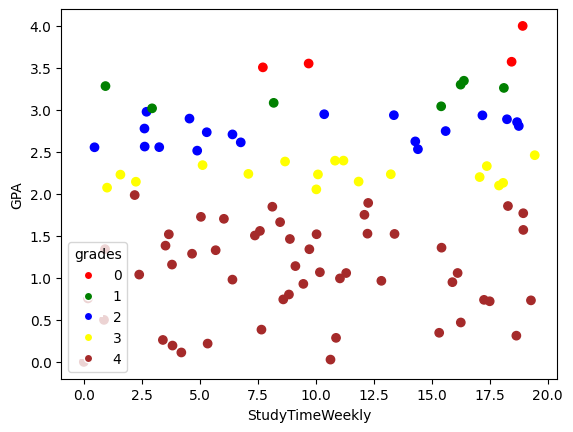

In [46]:
# sacar un trozo de los datos para hacer plot
students_plot_example = students[1:100]

# Mapear clases a colores
color_map = {
    0: 'red', #A
    1: 'green', #B
    2: 'blue', #C
    3: 'yellow', #D
    4: 'brown' #E
    }

# Crear la figura y los ejes
fig, ax = plt.subplots() # fig es la figura que contiene el gráfico, y ax son los ejes donde se dibujarán los datos.

# Graficar los puntos
scatter = ax.scatter(students_plot_example['StudyTimeWeekly'], students_plot_example['GPA'], c=students_plot_example['GradeClass'].map(color_map))

# Establecer etiquetas de los ejes
ax.set(xlabel='StudyTimeWeekly', ylabel='GPA')

# Crear leyenda manualmente
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, label=label) for label, color in color_map.items()]
ax.legend(handles=legend_elements, loc="lower left", title="grades")

plt.show()

In [47]:
# Dividir dataset en conjunto de entrenamiento y de prueba  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [48]:
# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [49]:
# Ver los coeficientes y el término de intercepción
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

Coeficientes: [[ 0.6681228   0.01907871 -0.30142295  0.17275804 -0.31256076  0.15356942
  -0.50031894  0.36770579  0.87565928  0.00288471  0.01090202 -0.73605332
   0.22210271  1.00303432]
 [-0.01663153  0.20883915  0.22134652 -0.24656723  0.1008849   0.19941202
  -1.19612887  0.34900478  0.20381011  0.20671992  0.07951391  0.49882647
   0.0226162   1.11919626]
 [-0.10338015 -0.00254472 -0.21186525  0.2884532   0.2260675  -0.10507798
   0.05608096 -0.04467013 -0.22626481  0.12281356 -0.17798814  0.08030255
  -0.00255915  0.53560855]
 [-0.15106702 -0.21524265  0.29724719 -0.09808916 -0.1037964  -0.31775631
   0.34092446 -0.25681342 -0.24988926 -0.09325971 -0.03208351  0.12808062
  -0.04558279 -0.60564295]
 [-0.39704411 -0.0101305  -0.00530551 -0.11655485  0.08940476  0.06985284
   1.29944239 -0.41522702 -0.60331532 -0.23915848  0.11965573  0.02884368
  -0.19657697 -2.05219618]]
Intercepto: [-2.64511739 -1.43777142  0.6831913   1.39118995  2.00850756]


In [50]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

In [51]:
# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de regresión logística en el conjunto de prueba: {:.2f}".format(accuracy))

Precisión del modelo de regresión logística en el conjunto de prueba: 0.68


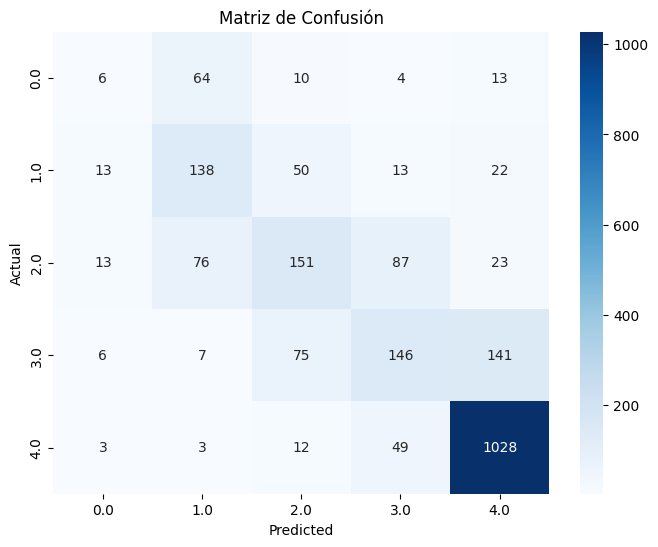

In [52]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Obtener etiquetas únicas presentes en y_test y y_pred
labels = sorted(set(y_test) | set(y_pred))

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

In [59]:
labels

[0.0, 1.0, 2.0, 3.0, 4.0]

In [62]:
# Calcular precision, recall y F1-score
l = []
for x in labels:
    if x == 0.0:
        l.append("A")
    if x == 1.0:
        l.append("B")
    if x == 2.0:
        l.append("C")
    if x == 3.0:
        l.append("D")
    if x == 4.0:
        l.append("E")
print(l)

report = classification_report(y_test, y_pred, target_names=l)
print("Reporte de Clasificación:")
print(report)

['A', 'B', 'C', 'D', 'E']
Reporte de Clasificación:
              precision    recall  f1-score   support

           A       0.15      0.06      0.09        97
           B       0.48      0.58      0.53       236
           C       0.51      0.43      0.47       350
           D       0.49      0.39      0.43       375
           E       0.84      0.94      0.89      1095

    accuracy                           0.68      2153
   macro avg       0.49      0.48      0.48      2153
weighted avg       0.65      0.68      0.66      2153



### Maquina de soporte vectorial

In [65]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [66]:
# Hacer predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test_scaled)

In [67]:
# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modelo SVM:", accuracy)

Accuracy del modelo SVM: 0.7398978169995355


Matriz de Confusión:
[[   7   64    8    4   14]
 [  11  155   39    7   24]
 [  17   63  187   66   17]
 [   7    4   67  239   58]
 [   3    4    5   78 1005]]


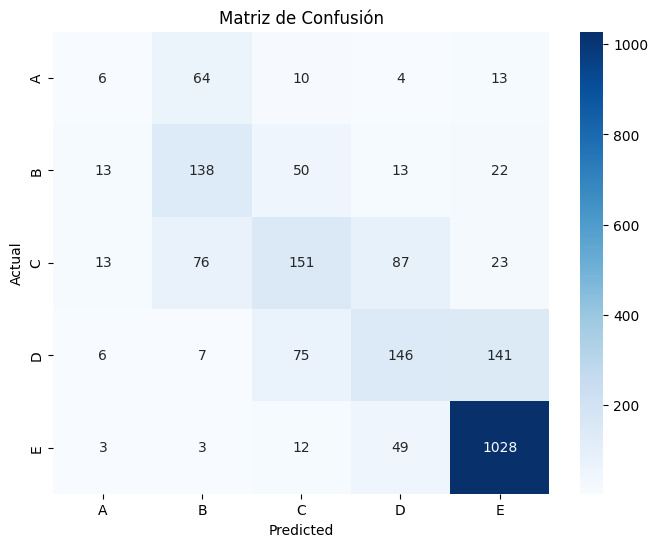

Reporte de Clasificación:
              precision    recall  f1-score   support

           A       0.16      0.07      0.10        97
           B       0.53      0.66      0.59       236
           C       0.61      0.53      0.57       350
           D       0.61      0.64      0.62       375
           E       0.90      0.92      0.91      1095

    accuracy                           0.74      2153
   macro avg       0.56      0.56      0.56      2153
weighted avg       0.73      0.74      0.73      2153



In [73]:
# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Obtener etiquetas únicas presentes en y_test y y_pred
labels = sorted(set(y_test) | set(y_pred))

l = []
for x in labels:
    if x == 0.0:
        l.append("A")
    if x == 1.0:
        l.append("B")
    if x == 2.0:
        l.append("C")
    if x == 3.0:
        l.append("D")
    if x == 4.0:
        l.append("E")

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=l, yticklabels=l)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Calcular precision, recall y F1-score
report = classification_report(y_test, y_pred, target_names=l)
print("Reporte de Clasificación:")
print(report)

### Selección de modelo y justificación
asdhsaidbsa
asduasdusa
asduhasds

## Problema de regresión
uso del dataset : Pokémon Combat Power Prediction

disponible en : https://www.kaggle.com/datasets/sujithmandala/pokmon-combat-power-prediction/data

### regresión lineal

In [113]:
poke_set = pd.read_csv('pokemon.csv')
poke_set.head()

,Name,Type 1,Type 2,Combat Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [114]:
encode = LabelEncoder()
for i in ['Type 1', 'Type 2', 'Legendary']:
    poke_set[i] = encode.fit_transform(poke_set[i])

In [122]:
features = ['Type 1','Type 2','HP','Defense','Sp. Atk','Sp. Def','Speed','Legendary']
X = poke_set[features]
y = poke_set['Combat Power']

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.15)



In [124]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [125]:
result = model.score(X_test, Y_test)
Y_pred = model.predict(X_test)
print(f'Score: {result}')
print(f"mse: {mean_squared_error(Y_test,Y_pred)}")
print(f"r2: {r2_score(Y_test,Y_pred)}")
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print(f"rmse: {rmse}")

# Comparar con la desviación estándar de y_test
std_y_test = np.std(Y_test)
print(f"Desviación estándar de y_test: {std_y_test}")


Score: 0.8669409098982788
mse: 1295.9542867575387
r2: 0.8669409098982788
rmse: 35.999365088255914
Desviación estándar de y_test: 98.68986767189632


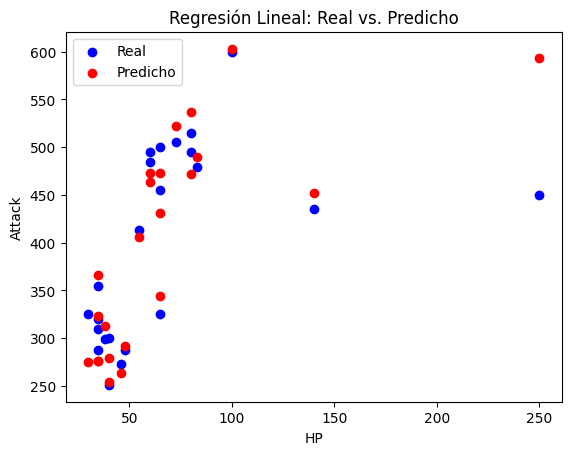

In [148]:
X
# Visualizar la relación entre la variable objetivo y una de las características
plt.scatter(X_test['HP'], Y_test, color='blue', label='Real')
plt.scatter(X_test['HP'], Y_pred, color='red', label='Predicho')
plt.xlabel('HP')
plt.ylabel('Attack')
plt.title('Regresión Lineal: Real vs. Predicho')
plt.legend()
plt.show()

### svr para regresión

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

In [105]:
svr_model.fit(X_train_scaled, y_train)

SVR()

In [110]:
# Hacer predicciones en el conjunto de prueba
y_pred = svr_model.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 9936.94
R^2 Score: 0.11


### Selección de modelo y justificación
asdhsaidbsa
asduasdusa
asduhasds

# Conclusiones
●	Los estudiantes entregarán un notebook jupyter que incluya una descripción de los conjuntos de datos, los pasos de preprocesamiento de datos, los algoritmos utilizados, los resultados de la evaluación de modelos y las conclusiones.